In [1]:
import pandas as pd
import polars as pl
import gzip
import pyarrow
import sys
from pathlib import Path
from tqdm import tqdm
import os
# Add the src folder to the Python path
# Replace this with the absolute path to your `src` directory
src_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/src"

# Add `src` to Python's search path
sys.path.append(src_path)

In [87]:
# with open(file_path, 'r') as file:
#     for line_num, line in enumerate(file):
#         if '"' in line and line.count('"') == 2:
#             print(f"Problem in line {line_num + 1}: {line}")

In [153]:
# with open(file_path, 'r') as infile, open(new_path, 'w') as outfile:
#     for line in infile:
#         # Fix mismatched quotes
#         # if '"' in line and line.count('"') % 2 != 0:
#             line = line.replace('"', '')  # Or implement a better custom fix
#         outfile.write(line)
import os

# Get the absolute path to `src`
src_path = os.path.abspath("src")
print("Absolute Path to `src`:", src_path)

# print("Directory contents:", os.listdir(src_path))

os.listdir()

Absolute Path to `src`: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Notebooks/src


['1_0_load_data.ipynb']

In [101]:
file_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/name.basics.tsv"
# cleaned_file_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/name.tsv"
new_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/name.tsv"
# load with pandas and clean out all \N values for birth year but keep death year
# with gzip.open(file_path, 'rt', encoding='utf-8') as gz_file:
names = pd.read_csv(new_path, sep='\t')
names = names[names['birthYear'] != '\\N']

names['deathYear'] = names['deathYear'].replace(r'\\N', '0', regex=True).astype(
    int)
names['birthYear'] = names['birthYear'].astype(int,)

In [9]:
# lets analyze this names file a bit

names = pl.read_parquet(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet")

print(names.shape)

names = names.filter(pl.col("birthYear") > 1899)

(625269, 7)


<Axes: xlabel='birthYear', ylabel='count'>

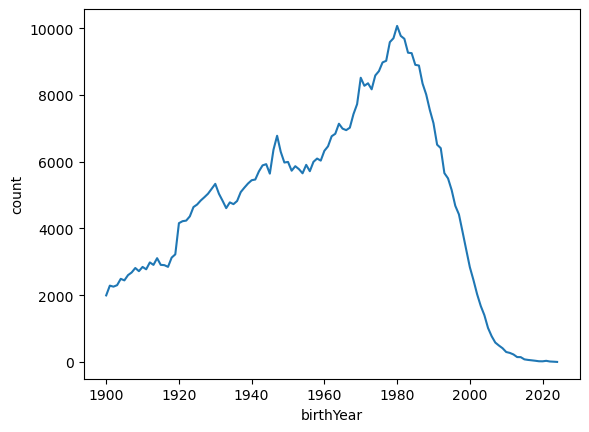

In [10]:
# groupby birth year and count
import matplotlib.pyplot as plt
import seaborn as sns
birth_yr_cnt = names.group_by('birthYear').agg(pl.count('birthYear').alias(
    'count')).sort('birthYear')


sns.lineplot(data=birth_yr_cnt.to_pandas(), x='birthYear', y='count')

In [8]:
names = names.filter(pl.col("primaryName").str.contains("Brad"))
names

nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,__index_level_0__
str,str,i64,i64,str,str,i64
"""nm0000093""","""Brad Pitt""",1963,0,"""producer,actor,executive""","""tt0137523,tt0356910,tt0114746,…",92
